In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import statistics
import math
import scipy as sp

from scipy import stats, optimize, interpolate
# from scipy.optimize import curve_fit
# from scipy.special import factorial

variation01 = '1801'
path01 = 'saved_data/pummelzeugs_1/'
thom01 = np.load(path01 + variation01 + '_thom.npy')

variation02 = '1802'
path02 = 'saved_data/pummelzeugs_2/'
thom02 = np.load(path02 + variation02 + '_thom.npy')

variation45 = '18045'
path45 = 'saved_data/pummelzeugs_45/'
thom45 = np.load(path45 + variation45 + '_thom.npy')

variation60 = '18060'
path60 = 'saved_data/pummelzeugs_60/'
thom60 = np.load(path60 + variation60 + '_thom.npy')

variation90 = '18090'
path90 = 'saved_data/pummelzeugs_90/'
thom90 = np.load(path90 + variation90 + '_thom.npy')

data = {'rc=178': thom01, 'rc=88': thom02, 'rc=2': thom45, 'rc=1': thom60, 'rc=0': thom90}
colors = ['darkred', 'orange', 'olivedrab', 'indigo', 'darkturquoise']


In [ ]:
#INPUT:
thom = thom90
int_length = 1000

def plot_lognorm_distribution(thom, int_length, save=False, id=0):
    max = thom.max().astype(int)
    l = len(thom)

    #number of intervalls
    print(max)
    ni = (max / int_length + 1).astype(int)
    print(ni)
    count = np.zeros(ni+1)

    for entry in thom:
        c = (entry / int_length).astype(int)
        count[c] += 1
    if count.sum() != l:
        print('FEHLER!')

    fig, ax = plt.subplots()
    x = np.arange(0, max + int_length, int_length)
    y = count[(x/int_length).astype(int)]
    maxy = y.max()
    thom = (thom/int_length).astype(int)
#     print(thom)

    param=sp.stats.lognorm.fit(thom)
    print(param)
    print(len(x+int_length/2))
    xxx = np.arange(0, ni + 1)
#     print(xxx)
    pdf_fitted = sp.stats.lognorm.pdf(xxx, param[0], loc=param[1], scale=param[2])
    maxfit = pdf_fitted.max()
#     print(maxfit)
    
#     sqd = 0
#     for i in range(0, len(x+int_length/2)):
#         sqd += (y[i] - pdf_fitted[i]*maxy/maxfit)**2
#     sqd = math.sqrt(sqd/len(x+int_length/2))
#     error = np.array([sqd]*len(x+int_length/2))
    plt.xlim(0, max + int_length)
    plt.bar(x+int_length/2, y, width=int_length, color='grey', alpha=0.5)
#     plt.plot(x+int_length/2,pdf_fitted*maxy/maxfit, color=colors[id])
    pdf_fitted2 = sp.stats.lognorm.pdf(xxx, param[0], loc=0, scale=param[2])
    plt.plot(x+int_length/2,pdf_fitted2*maxy/maxfit, color=colors[id])
#     pdf_fitted3 = sp.stats.lognorm.pdf(xxx, param[0], loc=0, scale=1)
#     plt.plot(x+int_length/2,pdf_fitted3, color=colors[id], linestyle='dotted')
    print(maxy/maxfit)
    error = [1] * len(x+int_length/2)
#     plt.errorbar(x+int_length/2, pdf_fitted*maxy/maxfit, yerr=error)
    if save:
        filename = str(id) + '_intervall=' + str(int_length) + '_lognormal_distribution' + '.jpg'
        plt.savefig(pathlib.Path('pictures').resolve() / filename)
# plot_lognorm_distribution(thom=thom90, int_length=1000, save=True)
# (0.6053059890020478, 2.0962585917393888, 20.475248718863046)

In [ ]:

for entry, name in enumerate(data):
     plot_lognorm_distribution(thom=data[name], int_length=1000, save=True, id=entry)

In [ ]:
#Standardabweichung

int_length = 1000
thom = (thom90/int_length).astype(int)*int_length
# print(thom)
stabw = np.std(thom)
print(stabw)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

xxx = np.arange(0, 33 + 1)

x = np.arange(0, 34000, 1000) + 500
y = sp.stats.lognorm.pdf(xxx, 0.5374, loc=0.0319, scale=7.5732)
e = np.array([1,1,1,1,1])

plt.plot(x,y*52.0/0.10689517255745022)

plt.show()

rc=0_
0.593595109881524 10.454200986510394
56
628.1499219545308
rc=0_lognormal_all_intervall=1000.jpg


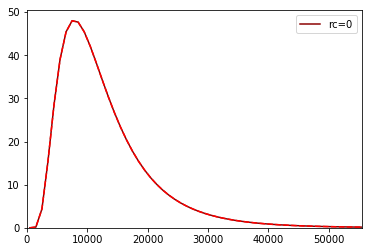

In [59]:
def plot_all_lognorm(thomarray, int_length, save=False):
#     colors = ['orange', 'olivedrab', 'darkturquoise']
    colors = ['darkred', 'orange', 'olivedrab', 'indigo', 'darkturquoise']
    fig, ax = plt.subplots()
    filename = ''

    for index, name in enumerate(thomarray):
        filename += (str(name)) + '_'
        print(filename)
        thom = thomarray[name]       
        max = thom.max().astype(int)
        l = len(thom)

    #number of intervalls
#         print(max)
        ni = (max / int_length + 1).astype(int)
#         print(ni)
        count = np.zeros(ni+1)

        for entry in thom:
            c = (entry / int_length).astype(int)
            count[c] += 1
        if count.sum() != l:
            print('FEHLER!')

        x = np.arange(0, max + int_length, int_length)
        y = count[(x/int_length).astype(int)]
        maxy = y.max()
        thom = (thom/int_length).astype(int)

        param=sp.stats.lognorm.fit(thom)
        print(param[0], param[2])
        xxx = np.arange(0, ni + 1)
        print(len(xxx))
        pdf_fitted2 = sp.stats.lognorm.pdf(xxx, param[0], loc=0, scale=param[2])
        maxfit2 = pdf_fitted2.max()
        plt.plot(x+int_length/2,pdf_fitted2*maxy/maxfit2, color=colors[index], label=name)
        print(maxy/maxfit2)
        plt.xlim(0, max + int_length)
        y = [f(val=v, sigma=0.5936, mu=2.347) for v in xxx]
        y = [yy*628 for yy in y]
        plt.plot(x+int_length/2,y, color='red', linestyle='dashed')
    plt.ylim(0)
    plt.legend()

    if save:
        filename = str(filename) + 'lognormal_all' + '_intervall=' + str(int_length) + '.jpg'
        print(filename)
        plt.savefig(pathlib.Path('pictures').resolve() / filename)
    

    plt.show()
data = {'rc=0': thom90}


plot_all_lognorm(thomarray=data, int_length=1000, save=True)

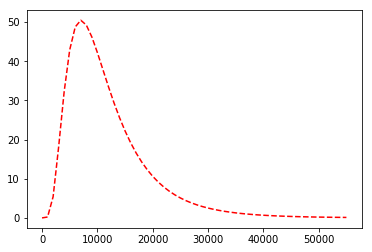

In [56]:
def f(val, sigma, mu):
    if val != 0:
        return 1/(math.sqrt(2*math.pi)*sigma*(val)) * math.exp(-(math.log(val)-mu)**2/(2*sigma**2))
    else:
        return 0



x = np.arange(0,56,1)
y = [f(val=v, sigma=0.5936, mu=2.3) for v in x]
y = [yy*628 for yy in y]

# print(y)
plt.plot(np.arange(0,56000,1000),y, color='red', linestyle='dashed')
